In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X = pd.DataFrame(cancer.data)
y = pd.Series(cancer.target)

X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,random_state=7,stratify=y.values)

In [2]:
from sklearn.svm import LinearSVC

'''
SVC는 L2,L1을 지원함
제약 조건의 강도 : C
최대 반복 횟수 : max_iter
학습의 분량 조절 : class_weight
3개 이상 분류 : multi_class
제약 조건 설정 : penalty
duality제어 : dual
'''

svc01_model = LinearSVC(C=0.1, 
                        random_state = 1,
                       max_iter = 10000000).fit(X_train,y_train)

In [3]:
svc_model = LinearSVC(C=1, 
                        random_state = 1,
                       max_iter = 10000000).fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


default는 L2제약조건을 걸고 계산
L2 제약조건을 걸때는 scaling이 되어있는 데이터냐 아니냐에 따라 max_iter에서 warning이 걸릴 수 있음

In [4]:
# scaling
from sklearn.preprocessing import MinMaxScaler
# 모든 데이터들을 비율에 맞게 쭉 다 0과 1사이로 넣어주는 것
# xscaled = (x-xm)/(xM-xm)
X_t = pd.DataFrame(X_train)
X_t.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,14.019601,19.330986,91.213052,642.286385,0.096628,0.103880,0.085781,0.048022,0.180726,0.062900,...,16.164702,25.791901,106.485798,866.738263,0.132790,0.255559,0.269104,0.113998,0.290473,0.084353
std,3.339807,4.392264,22.894020,326.801866,0.013954,0.050088,0.072286,0.036163,0.026332,0.007175,...,4.674754,6.333734,32.063118,550.882441,0.022805,0.156701,0.202222,0.063034,0.061087,0.018480
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156600,0.057370
25%,11.710000,16.170000,75.192500,420.625000,0.086688,0.066090,0.029240,0.020195,0.161900,0.057802,...,13.035000,21.215000,84.430000,516.025000,0.117825,0.146200,0.113475,0.064945,0.251500,0.072132
50%,13.280000,18.750000,86.140000,545.650000,0.095895,0.093540,0.061405,0.035125,0.178600,0.061455,...,14.940000,25.470000,97.655000,683.950000,0.131250,0.216850,0.230050,0.102300,0.282650,0.079740
75%,15.725000,21.817500,103.675000,761.600000,0.105050,0.130475,0.126675,0.070252,0.195300,0.066195,...,18.505000,30.015000,124.250000,1032.500000,0.145050,0.340975,0.379025,0.161200,0.317475,0.092158
max,27.420000,39.280000,186.900000,2501.000000,0.163400,0.311400,0.363500,0.168900,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.273300,0.663800,0.207500


어떤건 최대가 2501이고 어떤건 최소가 0.1 ==> 스케일링이 되어 있지 않음!

In [6]:
scaler = MinMaxScaler().fit(X_train)
X_train=scaler.transform(X_train)

X_tt = pd.DataFrame(X_train)
X_tt.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.344371,0.325363,0.331375,0.211574,0.338171,0.289364,0.235985,0.284325,0.377402,0.272538,...,0.292946,0.367055,0.279276,0.167504,0.364630,0.216121,0.230004,0.417115,0.263946,0.179732
std,0.163404,0.148538,0.159975,0.138622,0.138305,0.171522,0.198860,0.214111,0.132989,0.151108,...,0.166302,0.168810,0.159685,0.135392,0.161334,0.153076,0.172840,0.230642,0.120439,0.123096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.231371,0.218465,0.219429,0.117550,0.239642,0.159955,0.080440,0.119568,0.282323,0.165175,...,0.181608,0.245069,0.169431,0.081308,0.258755,0.109292,0.096987,0.237633,0.187106,0.098331
50%,0.308185,0.305715,0.295926,0.170583,0.330905,0.253955,0.168927,0.207963,0.366667,0.242102,...,0.249377,0.358475,0.235296,0.122579,0.353732,0.178308,0.196624,0.374314,0.248521,0.149004
75%,0.427810,0.409452,0.418454,0.262185,0.421647,0.380436,0.348487,0.415941,0.451010,0.341933,...,0.376201,0.479611,0.367747,0.208243,0.451362,0.299561,0.323953,0.589828,0.317183,0.231716
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
svc_scale_model = LinearSVC(C=0.1,random_state=1).fit(X_train,y_train)
svc_scale_model2 = LinearSVC(C=1,random_state=1).fit(X_train,y_train)
svc_scale_model3 = LinearSVC(C=10,random_state=1).fit(X_train,y_train)

max_iter Warning 이 뜨지 않고 잘 돌아감@@@

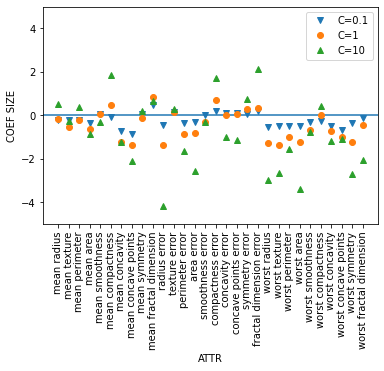

In [21]:
import matplotlib.pyplot as plt
plt.plot(svc_scale_model.coef_.T,'v',label='C=0.1')
plt.plot(svc_scale_model2.coef_.T,'o',label='C=1')
plt.plot(svc_scale_model3.coef_.T,'^',label='C=10')

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)

xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("ATTR")
plt.ylabel("COEF SIZE")
plt.legend()

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y.values,random_state=7,stratify=y.values)

In [23]:
# L1 제약조건 사용 
# L1 제약조건을 사용하는 경우에는 정규화 처리를 진행한 데이터상에서는 성능이 감소할 수도..
# dual=False 로 지정해야 사용가능

svc_scale_model21 = LinearSVC(penalty='l1',dual=False,C=0.1,random_state=1).fit(X_train,y_train)
svc_scale_model22 = LinearSVC(penalty='l1',dual=False,C=1,random_state=1).fit(X_train,y_train)
svc_scale_model23 = LinearSVC(penalty='l1',dual=False,C=10,random_state=1).fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


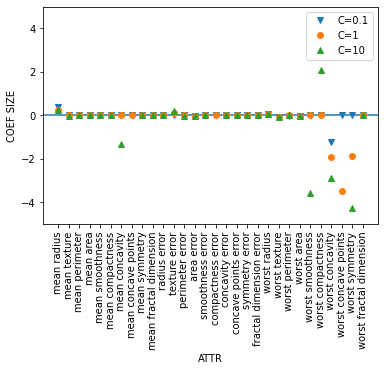

In [24]:
plt.plot(svc_scale_model21.coef_.T,'v',label='C=0.1')
plt.plot(svc_scale_model22.coef_.T,'o',label='C=1')
plt.plot(svc_scale_model23.coef_.T,'^',label='C=10')

plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)

xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("ATTR")
plt.ylabel("COEF SIZE")
plt.legend()